<a href="https://colab.research.google.com/github/kev-luo/tensorflow-course/blob/main/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import pprint

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-06-17 18:26:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-06-17 18:26:24 (116 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

# split text by line, returning an array of strings
corpus = data.lower().split("\n")

# create dictionary of words, with the key being the word and the value being the token for that word
tokenizer.fit_on_texts(corpus)
# total words = length of corpus' word index + OOV words
total_words = len(tokenizer.word_index) + 1

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(tokenizer.word_index)
pp.pprint(total_words)


In [28]:
# array of arrays. each value is a token representing a word. output looks like:
# [[51, 12],
#   [51, 12, 96],
#   [51, 12, 96, 1217]...]
input_sequences = []
# for each string in the array
for line in corpus:
  # convert each word in the string to their corresponding token
  # returns an array of arrays [[51, 12, 96, 1217, 48, 2, 69]]
  # we only want the first one so we specify index [0]
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
    # first iteration grabs first two tokens in the array
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# find the longest array of tokens in input_sequences
max_sequence_len = max([len(x) for x in input_sequences])
# pad all sequences to make them the same length 
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label from input_sequences
# the last item in each inner array is the label, 
# and the remaining items are the input. 
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
# one-hot encode labels
# ys will now contain an array of arrays, with the length of each inner array equal to the length of the corpus word index
# each inner array consists of 0's for each word in the corpus word index, and a 1 located at the index of the label
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [29]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [30]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [31]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [32]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
pp.pprint(tokenizer.word_index)

In [35]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
# convergence happens quicker with Bidirectional
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
377/377 [==============================] - 12s 10ms/step - loss: 6.6495 - accuracy: 0.0744
Epoch 2/100
377/377 [==============================] - 4s 10ms/step - loss: 5.7445 - accuracy: 0.1185
Epoch 3/100
377/377 [==============================] - 4s 10ms/step - loss: 4.8881 - accuracy: 0.1649
Epoch 4/100
377/377 [==============================] - 4s 10ms/step - loss: 3.9822 - accuracy: 0.2376
Epoch 5/100
377/377 [==============================] - 4s 10ms/step - loss: 3.1455 - accuracy: 0.3329
Epoch 6/100
377/377 [==============================] - 4s 10ms/step - loss: 2.4769 - accuracy: 0.4447
Epoch 7/100
377/377 [==============================] - 4s 10ms/step - loss: 1.9932 - accuracy: 0.5392
Epoch 8/100
377/377 [==============================] - 4s 10ms/step - loss: 1.7145 - accuracy: 0.5967
Epoch 9/100
377/377 [==============================] - 4s 10ms/step - loss: 1.6159 - accuracy: 0.6115
Epoch 10/100
377/377 [==============================] - 4s 10ms/step - loss: 1.30

In [36]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

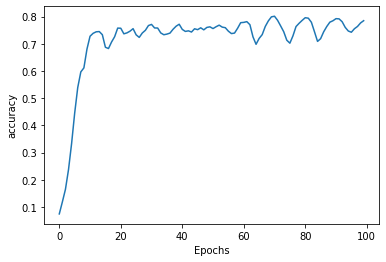

In [37]:
plot_graphs(history, 'accuracy')


In [44]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I've got a bad feeling about this replied to the west countrie their guff now eyes gone love hurrah me gone ray gone gone bottles gone eyes gone eyes return again across they whos inside beguiled entwine itself verdantly thee so today had i oft times i gone against gone gone alas gone against love had lovers rate too proud and my spirit ran free boundless ocean bride by i gone grave art eyes love gone and die on gone than his darlin shining brightly colleen kept hoping on your eyes twinkle bright eyes gone love gone and cream gone by rings band beneath her eyes love
